<a href="https://colab.research.google.com/github/Fayis-PV/100_ML_Projects/blob/main/0.Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
credit_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/creditcard.csv')
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
fraud_card = credit_data[credit_data['Class'] == 1]
valid_card = credit_data[credit_data['Class'] == 0]

fraud_ratio = (len(fraud_card)/len(credit_data))
print('Fraud Cases:', len(fraud_card))
print('Valid Cases:', len(valid_card))
print('Fraud Ratio:', fraud_ratio)
print('This is a unbalanced dataset!')

Fraud Cases: 492
Valid Cases: 284315
Fraud Ratio: 0.001727485630620034
This is a unbalanced dataset!


Amount details for both Fraud and Valid Transactions

In [17]:
print('Fraud Transactions:')
print(fraud_card.Amount.describe())
print()
print('Valid Transactions:')
print(valid_card.Amount.describe())

Fraud Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Valid Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Correlation Matrix of the Dataset

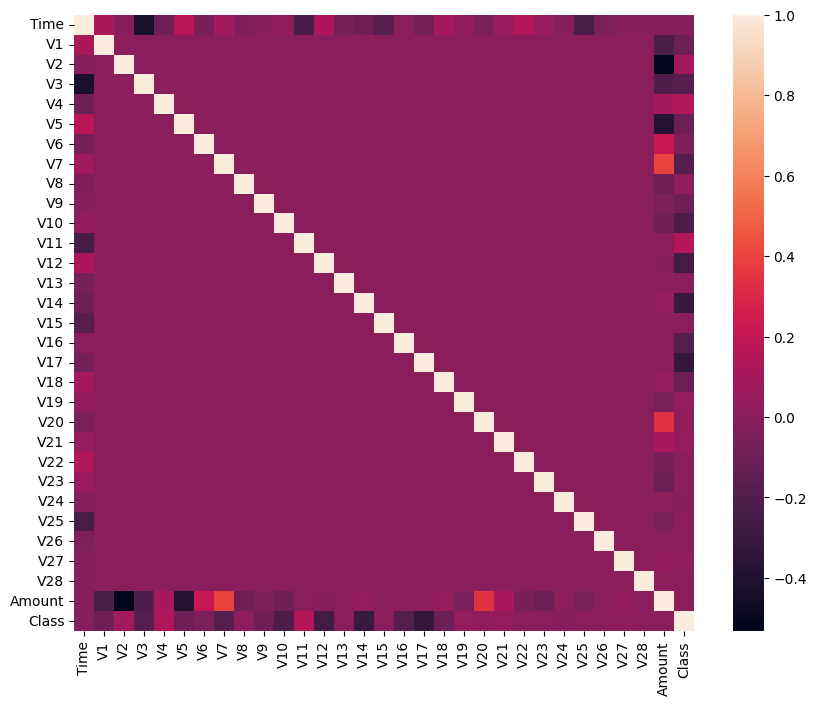

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(credit_data.corr())
plt.show()

Dataset distribution

In [25]:
X = credit_data.drop('Class',axis=1)
y = credit_data['Class']

X.shape,y.shape

((284807, 30), (284807,))

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

RandomForestClassifier and Fitting model

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))


Accuracy Score: 0.9995786664794073
Precision Score: 0.9625
Recall Score: 0.7857142857142857
F1 Score: 0.8651685393258427
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56861     3]
 [   21    77]]


<function matplotlib.pyplot.show(close=None, block=None)>

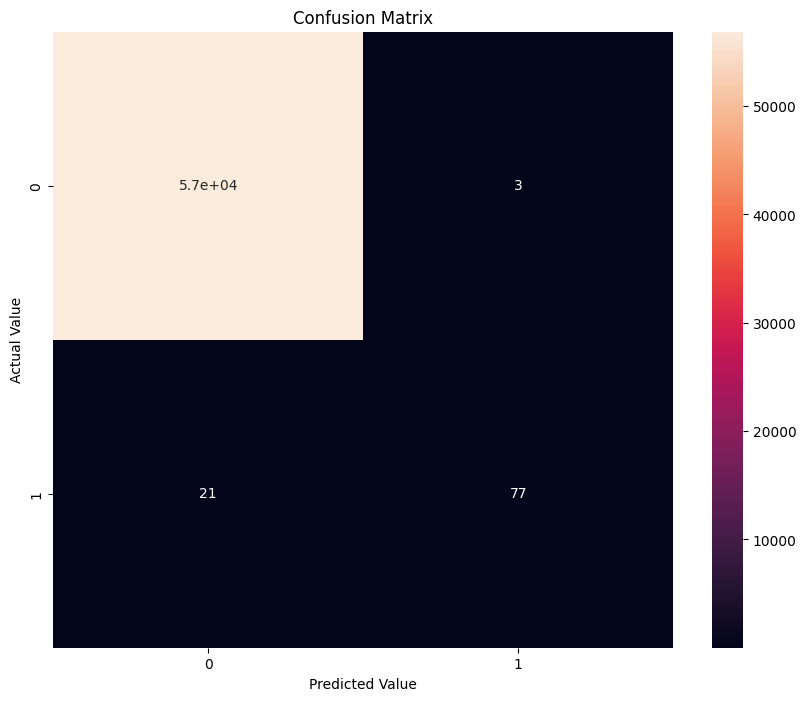

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show